In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
# This dataset was downloaded from Kaggale and link for this is 
# https://www.kaggle.com/code/kushal1996/customer-segmentation-k-means-analysis/input
df= pd.read_csv("Mall_Customers.csv.xls")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [30]:
df1= df.drop("CustomerID",axis=1)

In [31]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [35]:
sns.pairplot(df1)



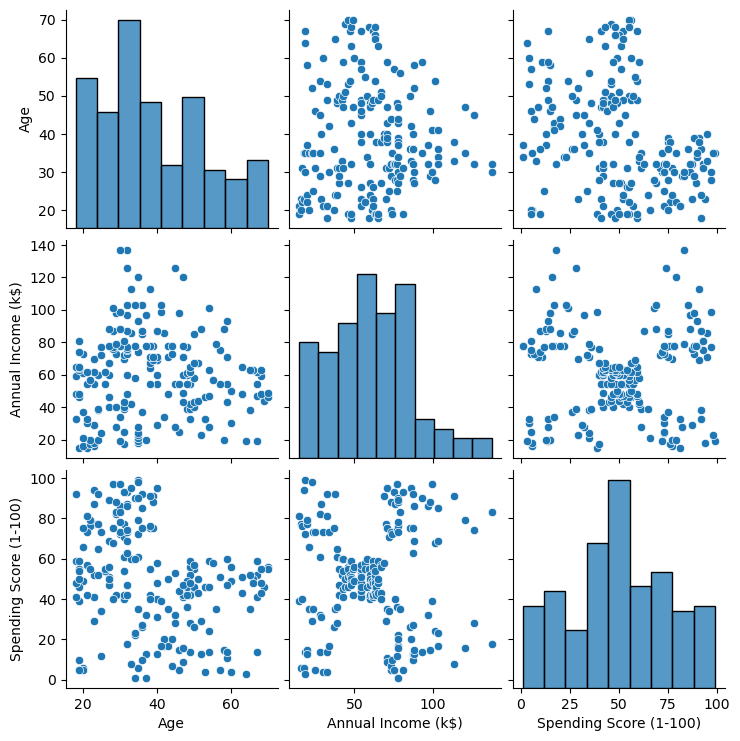

In [36]:
plt.show()

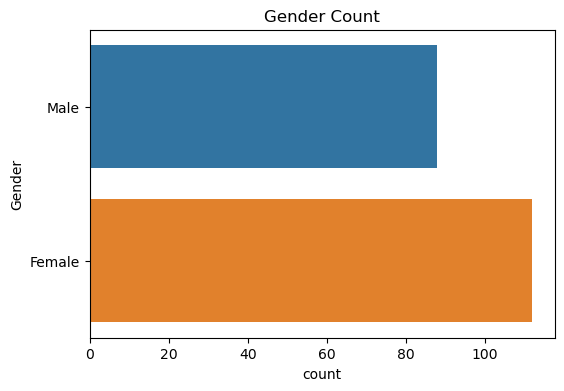

In [228]:
plt.figure(figsize=(6,4));
sns.countplot(y="Gender",data=df1);
plt.title("Gender Count")
plt.show();

In [74]:
#Clustering using age and score
from sklearn.cluster import KMeans

In [161]:
X=df1[["Age","Spending Score (1-100)"]].values
X[:5]

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40]])

In [162]:
import numpy as np

from sklearn.datasets import make_blobs

In [163]:
#X, y = make_blobs(n_samples=150, random_state=111)

In [164]:
X


array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [165]:
y

array([0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 2,
       0, 0, 0, 2, 1, 2, 0, 2, 0, 2, 1, 0, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1,
       2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 0,
       2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 1, 1, 2, 0,
       1, 1, 2, 1, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 2, 1, 0,
       0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 2, 1])

In [130]:
list1=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [146]:
inertia1=[]
for n in list1:
    model1=KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=123,algorithm="elkan")
    y_pred = model1.fit(X)
    inertia1.append(model1.inertia_)


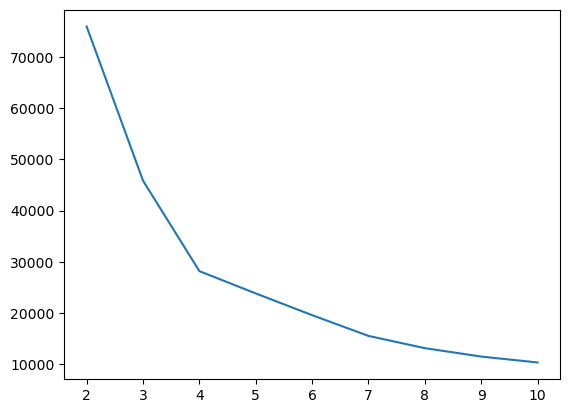

In [147]:
sns.lineplot(x=list1,y=inertia1)
plt.show()

In [185]:
# plot shows, 4  are the optimum number of clusters.
model1=KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=123,algorithm="elkan")
model1.fit(X)

KMeans(algorithm='elkan', n_clusters=4, random_state=123)

In [149]:
labels1=model1.labels_
labels1

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [150]:
centroids1=model1.cluster_centers_
centroids1

array([[55.70833333, 48.22916667],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [27.61702128, 49.14893617]])

In [173]:
y_pred.shape

(200,)

In [177]:
X[:,0].shape

(200,)

In [178]:
X[:,1].shape

(200,)

In [192]:
y_pred=KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=300,tol=0.0001,
              random_state=123,algorithm="elkan").fit_predict(X)


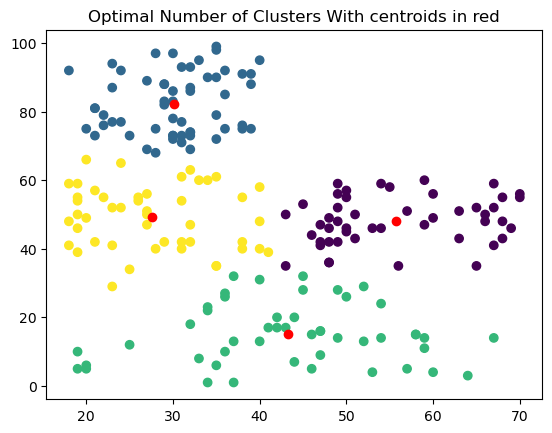

In [201]:
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.title("Optimal Number of Clusters With centroids in red")
plt.scatter(centroids1[:,0],centroids1[:,1],c="red")
plt.show()

In [202]:
# Segmentation using Annual Income and Spending Score

In [210]:
X2=df[['Annual Income (k$)' , 'Spending Score (1-100)']].values
X2[:6]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76]])

In [211]:
list2=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [212]:
inertia2=[]
for n in list2:
    model2=KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=123,algorithm="elkan")
    model2.fit(X2)
    inertia2.append(model2.inertia_)
  

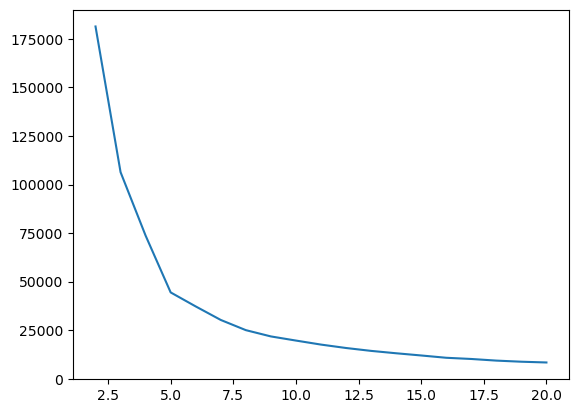

In [213]:
sns.lineplot(x=list2,y=inertia2)
plt.show()

In [214]:
# 5 is the optimum number of clusters by elblow rules.

In [220]:
model2=KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=123,algorithm="elkan")
model2.fit(X2)

KMeans(algorithm='elkan', n_clusters=5, random_state=123)

In [221]:
labels2=model2.labels_
labels2

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [222]:
centroids2=model2.cluster_centers_
centroids2

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

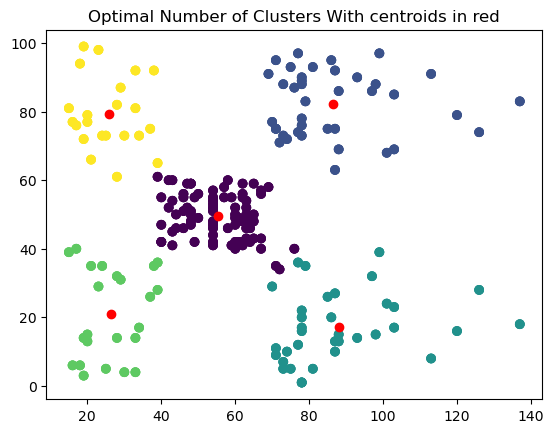

In [227]:
y_pred2=KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,tol=0.0001,
              random_state=123,algorithm="elkan").fit_predict(X2)

plt.scatter(X2[:,0],X2[:,1],c=y_pred2)
plt.title("Optimal Number of Clusters With centroids in red")
plt.scatter(centroids2[:,0],centroids2[:,1],c="red")

plt.show()


In [229]:
model2.get_params()

{'algorithm': 'elkan',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 5,
 'n_init': 10,
 'random_state': 123,
 'tol': 0.0001,
 'verbose': 0}

AttributeError: 'KMeans' object has no attribute 'params'